## Introducción a las Redes Neuronales
Plan de lección:
* El ML trata sobre aprender funciones
* El descenso del gradiente ayuda a encontrar la "mejor" función
* Las redes neuronales (y sus descendientes) son muy buenos aproximadores de funciones


## ML trata sobre aprender funciones (15 min)

Para obtener una intuición de cómo funcionan los sistemas actuales de machine learning, elegiremos un par de sistemas reales de ML e intentaremos expresarlos como funciones.

Para cada ejemplo a continuación:
1. Piensa en qué información necesita la función (entradas)
2. Piensa en qué debe devolver la función (salidas)
3. Intenta escribir el encabezado de la función por ti mismo antes de revisar la solución


Haré un ejemplo yo mismo para que puedas ver lo que buscamos.

**Clasificador de Sentimientos**
Un cine quiere saber si los comentarios de Instagram sobre sus películas son positivos o negativos. El sistema de machine learning que usarán probablemente se verá así:


In [1]:
def clasificar_sentimiento(comentario_pelicula: str) -> float:
    """
    Entrada: Un mensaje de texto como "¡Me encanta esta película!"
    Salida: Un número desde -1 (muy negativo) hasta 1 (muy positivo)
    """
    pass # La palabra clave 'pass' indica que la función aún no está implementada


¡Intenta algunos otros ejemplos tú mismo!

**Clasificador de imágenes**  
Una empresa de vehículos autónomos quiere saber si una imagen muestra un peatón. Intenta escribir en el bloque de código a continuación cómo escribirías el encabezado de la función para ese sistema de machine learning.

<details>
    <summary>Una Posible Solución (¡Mira solo después de intentarlo tú mismo!)</summary>
    ```  
    
    import numpy as np

    def es_peaton(imagen: np.ndarray) -> bool:
        """
        Entrada: Un array numpy que representa una imagen. La forma del array es (altura, ancho, 3)
        donde la última dimensión indica el color en RGB con tres números, uno para rojo, verde y azul.
        Salida: Un booleano (True o False) que indica si la imagen muestra un peatón
        """
        pass
    ```    
</details>


In [2]:
# Crea aquí el encabezado de la función para el clasificador de imágenes:


Una pregunta interesante para el ejercicio anterior es, ¿cómo podemos pasar la imagen al sistema de ML de una manera que pueda entender? Podríamos pensar en pasar un archivo de imagen (por ejemplo, PNG o JPEG), pero para el sistema eso es solo una gran colección de 1s y 0s y es realmente difícil darle sentido.

Bajo el capó, los sistemas de ML solo pueden entender sus entradas y salidas si son números. Cuando pasamos un texto, una imagen o un audio, hay un proceso subyacente para convertirlos en números, y también para convertirlos de vuelta a un formato que podamos entender.

Para las imágenes, este proceso es bastante directo. Simplemente tomamos cada píxel y extraemos la intensidad (de 0 a 1) de tres colores base: rojo, verde y azul. Luego representamos la imagen como una colección de todos los valores de píxeles organizados como un array de forma (altura, ancho, 3).

Veamos un ejemplo de cómo funciona esto. Puedes cambiar los valores de `red_values`, `blue_values`, y `green_values` para ver cómo cambia la imagen.


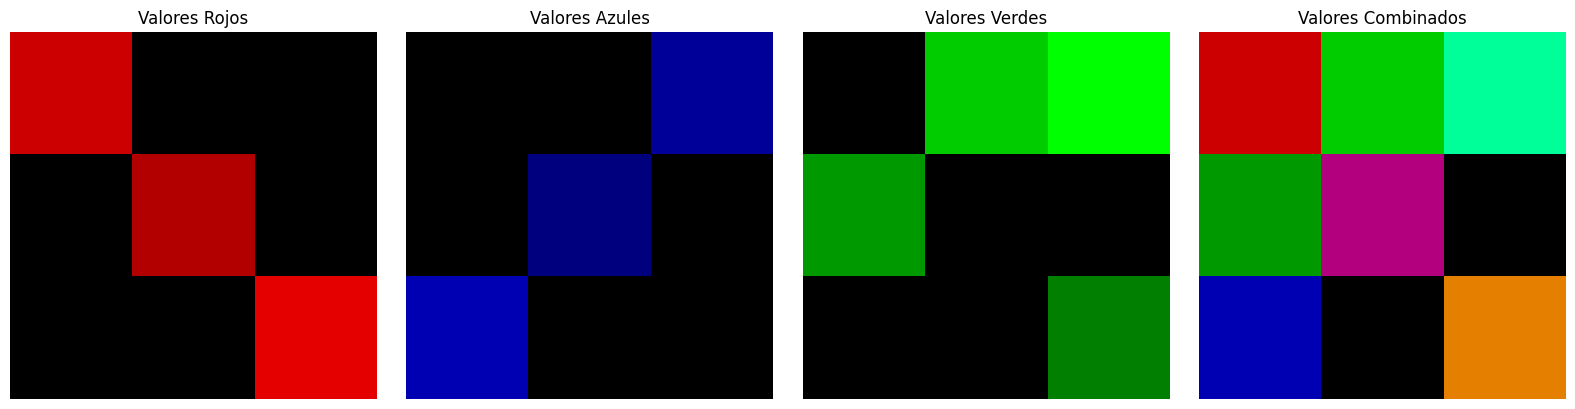

In [3]:
import matplotlib.pyplot as plt
import numpy as np

valores_rojo = [
    [0.8, 0, 0],
    [0, 0.7, 0],
    [0, 0, 0.9]
]
valores_azul = [
    [0, 0, 0.6],
    [0, 0.5, 0],
    [0.7, 0, 0]
]
valores_verde = [
    [0, 0.8, 1],
    [0.6, 0, 0],
    [0, 0, 0.5]
]

# Crear matrices de imagen de forma (altura, ancho, [R, G, B])
img_roja = np.zeros((3, 3, 3))
img_azul = np.zeros((3, 3, 3))
img_verde = np.zeros((3, 3, 3))

# Establecer los valores para cada canal
img_roja[:, :, 0] = np.array(valores_rojo)  # Canal rojo
img_azul[:, :, 2] = np.array(valores_azul)  # Canal azul
img_verde[:, :, 1] = np.array(valores_verde)  # Canal verde
img_combinada = img_roja + img_azul + img_verde

def graficar_matrices_imagen(img_roja, img_azul, img_verde, img_combinada):
    # Crear una figura con 4 subgráficos lado a lado
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

    # Graficar cada imagen
    ax1.imshow(img_roja)
    ax1.set_title('Valores Rojos')
    ax1.axis('off')

    ax2.imshow(img_azul)
    ax2.set_title('Valores Azules')
    ax2.axis('off')

    ax3.imshow(img_verde)
    ax3.set_title('Valores Verdes')
    ax3.axis('off')

    ax4.imshow(img_combinada)
    ax4.set_title('Valores Combinados')
    ax4.axis('off')

    plt.tight_layout()
    plt.show()

graficar_matrices_imagen(img_roja, img_azul, img_verde, img_combinada)


También podemos ver cómo se ve este proceso con una imagen real de internet. Reduje la resolución de la imagen para que sea más evidente que está compuesta de píxeles individuales.


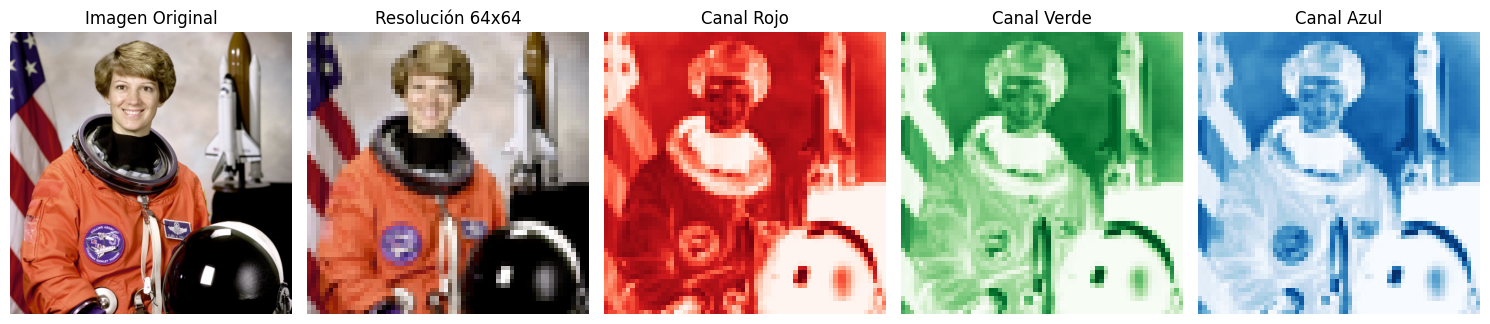

Forma de la imagen de baja resolución: (64, 64, 3)


In [4]:
# Cargar y mostrar una imagen de ejemplo
from PIL import Image
import requests
from io import BytesIO

# Obtener una pequeña imagen de ejemplo de internet (una foto de astronauta)
url = "https://raw.githubusercontent.com/scikit-image/scikit-image/master/skimage/data/astronaut.png"
respuesta = requests.get(url)
img = Image.open(BytesIO(respuesta.content))

def graficar_imagen_por_canales(img):
    # Redimensionar a una resolución muy baja (ej., 64x64)
    imagen_pequeña = img.resize((64, 64))

    # Convertir a array numpy
    array_imagen = np.array(imagen_pequeña)

    # Crear figura y mostrar
    plt.figure(figsize=(15, 4))

    # Imagen original
    plt.subplot(1, 5, 1)
    plt.imshow(img)
    plt.title('Imagen Original')
    plt.axis('off')

    # Imagen redimensionada
    plt.subplot(1, 5, 2)
    plt.imshow(array_imagen)
    plt.title('Resolución 64x64')
    plt.axis('off')

    # Canal rojo
    plt.subplot(1, 5, 3)
    plt.imshow(array_imagen[:,:,0], cmap='Reds')
    plt.title('Canal Rojo')
    plt.axis('off')

    # Canal verde
    plt.subplot(1, 5, 4)
    plt.imshow(array_imagen[:,:,1], cmap='Greens')
    plt.title('Canal Verde')
    plt.axis('off')

    # Canal azul
    plt.subplot(1, 5, 5)
    plt.imshow(array_imagen[:,:,2], cmap='Blues')
    plt.title('Canal Azul')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Imprimir la forma del array de la imagen de baja resolución
    print(f"Forma de la imagen de baja resolución: {array_imagen.shape}")

graficar_imagen_por_canales(img)


Si estás interesado, puedes preguntarle a una IA cómo puedes transformar texto en números para alimentar sistemas de ML como ChatGPT (pregunta, por ejemplo, "¿Cómo codifica ChatGPT el texto? Solo estoy un poco familiarizado con redes neuronales y aprendizaje automático").

Por ahora, ignoraremos este proceso y asumiremos que los sistemas de ML pueden recibir texto directamente. ¿Cómo se vería la función cabecera para este sistema de ML?:

**Chatbot LLM**
OpenAI está creando un chatbot que puede responder preguntas en chatgpt.com. Para reducir costos, este chatbot no acepta imágenes ni voz, solo mensajes de texto. De manera similar, solo produce texto como salida.

<details>
    <summary>Una Posible Solución</summary>
    ```
    def chatbot(user_message: str) -> str:  
        """  
        Entrada: Una cadena con el mensaje del usuario  
        Salida: Una cadena con la respuesta del chatbot  
        """  
        pass  
    ```    
</details>


In [5]:
# Crear la función cabecera para el chatbot aquí:


## El descenso del gradiente ayuda a encontrar la "mejor" función (1 min)

Aunque las matemáticas y la intuición detrás del descenso del gradiente son increíblemente interesantes, no tenemos suficiente tiempo para cubrirlo aquí. Si estás interesado, te recomiendo este video de 3Blue1Brown ([inglés](https://www.youtube.com/watch?v=IHZwWFHWa-w), [español](https://www.youtube.com/watch?v=mwHiaTrQOiI)). Además, si quieres un desafío, puedes intentar implementar el algoritmo de descenso del gradiente por ti mismo en esta [página](https://neetcode.io/problems/gradient-descent).


## Las redes neuronales son muy buenos aproximadores de funciones (30 min)

* Introducir cómo las redes neuronales pueden formar circuitos.
* Mencionar el paper "Zoom in" para aquellos que quieran aprender más.
* Hablar sobre cómo es más fácil aprender de ejemplos que a través de RL (la importancia de los datos, nuestro enfoque en el aprendizaje supervisado).
* Introducir otros conjuntos de datos simples que la gente puede usar para entrenar redes neuronales pequeñas.
* Hablar sobre cómo la escala permite realizar tareas más complejas.


In [6]:
# Crear la función cabecera para el chatbot aquí:
